<a href="https://colab.research.google.com/github/shumshersubashgautam/MRI_BRAIN_TUMOR-Yolov8/blob/main/YoloV8_44_MRI_Brain_Tumor_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shumshersubash2018","key":"f147ab838df934330c5631a31b26bec8"}'}

In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d fernando2rad/brain-tumor-mri-images-44c

 96% 180M/188M [00:02<00:00, 97.0MB/s]
100% 188M/188M [00:02<00:00, 84.3MB/s]


In [8]:
!mkdir braintumor-44

In [7]:
!unzip /content/brain-tumor-mri-images-44c.zip -d tumor

Archive:  /content/brain-tumor-mri-images-44c.zip
  inflating: tumor/Astrocitoma T1/005_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/006_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg  
  inflating: tumor/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg  
  inflating: tumor/Astrocito

In [14]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile

In [17]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile

data_dir='/content/braintumor-44'
print(len(os.listdir(data_dir+'/Astrocitoma T1/')))
print(len(os.listdir(data_dir+'/Ganglioglioma T1/')))
print(len(os.listdir(data_dir+'/Germinoma T2/')))

176
20
33


In [18]:
print(os.listdir(data_dir))

['Oligodendroglioma T2', 'Glioblastoma T2', 'Granuloma T1C+', 'Astrocitoma T2', 'Ganglioglioma T1', 'Ependimoma T2', 'Oligodendroglioma T1C+', 'Schwannoma T2', 'Astrocitoma T1', 'Germinoma T2', 'Glioblastoma T1', 'Astrocitoma T1C+', 'Schwannoma T1C+', 'Neurocitoma T1', 'Meduloblastoma T1', 'Glioblastoma T1C+', 'Granuloma T2', 'Ependimoma T1C+', 'Papiloma T2', '_NORMAL T2', 'Tuberculoma T2', '.ipynb_checkpoints', 'train', 'Carcinoma T2', 'Ependimoma T1', 'Meningioma T1C+', 'Ganglioglioma T1C+', 'Carcinoma T1C+', 'Carcinoma T1', 'Neurocitoma T1C+', 'Papiloma T1C+', 'Germinoma T1', 'Ganglioglioma T2', 'Tuberculoma T1', 'Meningioma T2', 'Granuloma T1', '_NORMAL T1', 'Meningioma T1', 'Germinoma T1C+', 'Papiloma T1', 'Meduloblastoma T1C+', 'Tuberculoma T1C+', 'Meduloblastoma T2', 'Neurocitoma T2', 'Schwannoma T1', 'Oligodendroglioma T1']


In [19]:
classes=os.listdir(data_dir)

In [22]:
classes.remove('.ipynb_checkpoints')

In [23]:
classes

['Oligodendroglioma T2',
 'Glioblastoma T2',
 'Granuloma T1C+',
 'Astrocitoma T2',
 'Ganglioglioma T1',
 'Ependimoma T2',
 'Oligodendroglioma T1C+',
 'Schwannoma T2',
 'Astrocitoma T1',
 'Germinoma T2',
 'Glioblastoma T1',
 'Astrocitoma T1C+',
 'Schwannoma T1C+',
 'Neurocitoma T1',
 'Meduloblastoma T1',
 'Glioblastoma T1C+',
 'Granuloma T2',
 'Ependimoma T1C+',
 'Papiloma T2',
 '_NORMAL T2',
 'Tuberculoma T2',
 'Carcinoma T2',
 'Ependimoma T1',
 'Meningioma T1C+',
 'Ganglioglioma T1C+',
 'Carcinoma T1C+',
 'Carcinoma T1',
 'Neurocitoma T1C+',
 'Papiloma T1C+',
 'Germinoma T1',
 'Ganglioglioma T2',
 'Tuberculoma T1',
 'Meningioma T2',
 'Granuloma T1',
 '_NORMAL T1',
 'Meningioma T1',
 'Germinoma T1C+',
 'Papiloma T1',
 'Meduloblastoma T1C+',
 'Tuberculoma T1C+',
 'Meduloblastoma T2',
 'Neurocitoma T2',
 'Schwannoma T1',
 'Oligodendroglioma T1']

In [24]:
source_path=[f'/content/braintumor-44/{a}' for a in classes]
print(source_path)

['/content/braintumor-44/Oligodendroglioma T2', '/content/braintumor-44/Glioblastoma T2', '/content/braintumor-44/Granuloma T1C+', '/content/braintumor-44/Astrocitoma T2', '/content/braintumor-44/Ganglioglioma T1', '/content/braintumor-44/Ependimoma T2', '/content/braintumor-44/Oligodendroglioma T1C+', '/content/braintumor-44/Schwannoma T2', '/content/braintumor-44/Astrocitoma T1', '/content/braintumor-44/Germinoma T2', '/content/braintumor-44/Glioblastoma T1', '/content/braintumor-44/Astrocitoma T1C+', '/content/braintumor-44/Schwannoma T1C+', '/content/braintumor-44/Neurocitoma T1', '/content/braintumor-44/Meduloblastoma T1', '/content/braintumor-44/Glioblastoma T1C+', '/content/braintumor-44/Granuloma T2', '/content/braintumor-44/Ependimoma T1C+', '/content/braintumor-44/Papiloma T2', '/content/braintumor-44/_NORMAL T2', '/content/braintumor-44/Tuberculoma T2', '/content/braintumor-44/Carcinoma T2', '/content/braintumor-44/Ependimoma T1', '/content/braintumor-44/Meningioma T1C+', '/

In [25]:
classes_dir=[f'{a}_dir' for a in classes]
classes_dir

['Oligodendroglioma T2_dir',
 'Glioblastoma T2_dir',
 'Granuloma T1C+_dir',
 'Astrocitoma T2_dir',
 'Ganglioglioma T1_dir',
 'Ependimoma T2_dir',
 'Oligodendroglioma T1C+_dir',
 'Schwannoma T2_dir',
 'Astrocitoma T1_dir',
 'Germinoma T2_dir',
 'Glioblastoma T1_dir',
 'Astrocitoma T1C+_dir',
 'Schwannoma T1C+_dir',
 'Neurocitoma T1_dir',
 'Meduloblastoma T1_dir',
 'Glioblastoma T1C+_dir',
 'Granuloma T2_dir',
 'Ependimoma T1C+_dir',
 'Papiloma T2_dir',
 '_NORMAL T2_dir',
 'Tuberculoma T2_dir',
 'Carcinoma T2_dir',
 'Ependimoma T1_dir',
 'Meningioma T1C+_dir',
 'Ganglioglioma T1C+_dir',
 'Carcinoma T1C+_dir',
 'Carcinoma T1_dir',
 'Neurocitoma T1C+_dir',
 'Papiloma T1C+_dir',
 'Germinoma T1_dir',
 'Ganglioglioma T2_dir',
 'Tuberculoma T1_dir',
 'Meningioma T2_dir',
 'Granuloma T1_dir',
 '_NORMAL T1_dir',
 'Meningioma T1_dir',
 'Germinoma T1C+_dir',
 'Papiloma T1_dir',
 'Meduloblastoma T1C+_dir',
 'Tuberculoma T1C+_dir',
 'Meduloblastoma T2_dir',
 'Neurocitoma T2_dir',
 'Schwannoma T1_dir

In [26]:
for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

Oligodendroglioma T2_dir :  66
Glioblastoma T2_dir :  55
Granuloma T1C+_dir :  31
Astrocitoma T2_dir :  171
Ganglioglioma T1_dir :  20
Ependimoma T2_dir :  57
Oligodendroglioma T1C+_dir :  72
Schwannoma T2_dir :  123
Astrocitoma T1_dir :  176
Germinoma T2_dir :  33
Glioblastoma T1_dir :  55
Astrocitoma T1C+_dir :  233
Schwannoma T1C+_dir :  194
Neurocitoma T1_dir :  130
Meduloblastoma T1_dir :  23
Glioblastoma T1C+_dir :  94
Granuloma T2_dir :  17
Ependimoma T1C+_dir :  48
Papiloma T2_dir :  63
_NORMAL T2_dir :  271
Tuberculoma T2_dir :  33
Carcinoma T2_dir :  73
Ependimoma T1_dir :  45
Meningioma T1C+_dir :  369
Ganglioglioma T1C+_dir :  18
Carcinoma T1C+_dir :  112
Carcinoma T1_dir :  66
Neurocitoma T1C+_dir :  223
Papiloma T1C+_dir :  108
Germinoma T1_dir :  27
Ganglioglioma T2_dir :  23
Tuberculoma T1_dir :  28
Meningioma T2_dir :  233
Granuloma T1_dir :  30
_NORMAL T1_dir :  251
Meningioma T1_dir :  272
Germinoma T1C+_dir :  40
Papiloma T1_dir :  66
Meduloblastoma T1C+_dir :  67
T

In [27]:
try:
    os.mkdir('/content/braintumor/train')
    os.mkdir('/content/braintumor/valid')
    os.mkdir('/content/braintumor/test')
except OSError:
    pass

In [28]:
TRAINING_PATH='/content/braintumor/train'
VALIDATION_PATH='/content/braintumor/valid'
training_dir_path=[f'/content/braintumor/train/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/braintumor/valid/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/braintumor/test/{a}' for a in classes]
print('\n',testing_dir_path)


 ['/content/braintumor/train/Oligodendroglioma T2', '/content/braintumor/train/Glioblastoma T2', '/content/braintumor/train/Granuloma T1C+', '/content/braintumor/train/Astrocitoma T2', '/content/braintumor/train/Ganglioglioma T1', '/content/braintumor/train/Ependimoma T2', '/content/braintumor/train/Oligodendroglioma T1C+', '/content/braintumor/train/Schwannoma T2', '/content/braintumor/train/Astrocitoma T1', '/content/braintumor/train/Germinoma T2', '/content/braintumor/train/Glioblastoma T1', '/content/braintumor/train/Astrocitoma T1C+', '/content/braintumor/train/Schwannoma T1C+', '/content/braintumor/train/Neurocitoma T1', '/content/braintumor/train/Meduloblastoma T1', '/content/braintumor/train/Glioblastoma T1C+', '/content/braintumor/train/Granuloma T2', '/content/braintumor/train/Ependimoma T1C+', '/content/braintumor/train/Papiloma T2', '/content/braintumor/train/_NORMAL T2', '/content/braintumor/train/Tuberculoma T2', '/content/braintumor/train/Carcinoma T2', '/content/braint

In [29]:
for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

In [30]:
for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

In [31]:
for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

In [32]:
def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int( len(files)* SPLIT_SIZE)
    validation_length = int(len(files) * 0.10)
    testing_length = int(len(files) - training_length - validation_length)
    
    print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
    print('training_length:',training_length)
    print('validation_length:',validation_length)
    print('testing_length:',testing_length)
    
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:(training_length+validation_length)]
    testing_set=shuffled_set[:testing_length]

    print(len(training_set))
    print(len(validation_set))
    print(len(testing_set))
    
    for filename in training_set:
        this_file = SOURCE +'/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
    

    for filename in validation_set:
        this_file = SOURCE +'/'+ filename
        destination = VALIDATION+'/' + filename
        copyfile(this_file, destination)
        
    for filename in validation_set:
        this_file = SOURCE +'/'+ filename
        destination = TESTING+'/' + filename
        copyfile(this_file, destination)

In [33]:
split_size = .85
for source,train_dir_path,val_dir_path,test_dir_path in zip(source_path,\
                                training_dir_path,validation_dir_path, testing_dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
    split_data(source,train_dir_path,val_dir_path,test_dir_path, split_size)
    print('Splitting \n')

Split Data
SOURCE:  /content/braintumor-44/Oligodendroglioma T2 
 TRAINING /content/braintumor/train/Oligodendroglioma T2 
 VALIDATION /content/braintumor/valid/Oligodendroglioma T2 
  66
training_length: 56
validation_length: 6
testing_length: 4
56
6
4
Splitting 

Split Data
SOURCE:  /content/braintumor-44/Glioblastoma T2 
 TRAINING /content/braintumor/train/Glioblastoma T2 
 VALIDATION /content/braintumor/valid/Glioblastoma T2 
  55
training_length: 46
validation_length: 5
testing_length: 4
46
5
4
Splitting 

Split Data
SOURCE:  /content/braintumor-44/Granuloma T1C+ 
 TRAINING /content/braintumor/train/Granuloma T1C+ 
 VALIDATION /content/braintumor/valid/Granuloma T1C+ 
  31
training_length: 26
validation_length: 3
testing_length: 2
26
3
2
Splitting 

Split Data
SOURCE:  /content/braintumor-44/Astrocitoma T2 
 TRAINING /content/braintumor/train/Astrocitoma T2 
 VALIDATION /content/braintumor/valid/Astrocitoma T2 
  171
training_length: 145
validation_length: 17
testing_length: 9
145

In [10]:
!nvidia-smi

Wed Apr 12 12:59:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.74 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/107.7 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image
     

In [34]:
!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/braintumor/ epochs=300 imgsz=128

Ultralytics YOLOv8.0.74 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/braintumor/, epochs=300, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [35]:
# Ultralytics YOLO 🚀, GPL-3.0 license

import contextlib
import math
from pathlib import Path

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from PIL import __version__ as pil_version

from ultralytics.yolo.utils import LOGGER, TryExcept, threaded

# from .checks import check_font, check_version, is_ascii
# from .files import increment_path
# from .ops import clip_coords, scale_image, xywh2xyxy, xyxy2xywh

matplotlib.rc('font', **{'size': 11})
matplotlib.use('Agg')  # for writing to files only


class Colors:
    # Ultralytics color palette https://ultralytics.com/
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'


class Annotator:
    # YOLOv8 Annotator for train/val mosaics and jpgs and detect/hub inference annotations
    def __init__(self, im, line_width=None, font_size=None, font='Arial.ttf', pil=False, example='abc'):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        non_ascii = not is_ascii(example)  # non-latin labels, i.e. asian, arabic, cyrillic
        self.pil = pil or non_ascii
        if self.pil:  # use PIL
            self.pil_9_2_0_check = check_version(pil_version, '9.2.0')  # deprecation check
            self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
            self.draw = ImageDraw.Draw(self.im)
            try:
                font = check_font('Arial.Unicode.ttf' if non_ascii else font)
                size = font_size or max(round(sum(self.im.size) / 2 * 0.035), 12)
                self.font = ImageFont.truetype(str(font), size)
            except Exception:
                self.font = ImageFont.load_default()
        else:  # use cv2
            self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        if isinstance(box, torch.Tensor):
            box = box.tolist()
        if self.pil or not is_ascii(label):
            self.draw.rectangle(box, width=self.lw, outline=color)  # box
            if label:
                if self.pil_9_2_0_check:
                    _, _, w, h = self.font.getbbox(label)  # text width, height (New)
                else:
                    w, h = self.font.getsize(label)  # text width, height (Old, deprecated in 9.2.0)
                outside = box[1] - h >= 0  # label fits outside box
                self.draw.rectangle(
                    (box[0], box[1] - h if outside else box[1], box[0] + w + 1,
                     box[1] + 1 if outside else box[1] + h + 1),
                    fill=color,
                )
                # self.draw.text((box[0], box[1]), label, fill=txt_color, font=self.font, anchor='ls')  # for PIL>8.0
                self.draw.text((box[0], box[1] - h if outside else box[1]), label, fill=txt_color, font=self.font)
        else:  # cv2
            p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
            cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
            if label:
                tf = max(self.lw - 1, 1)  # font thickness
                w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
                outside = p1[1] - h >= 3
                p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
                cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
                cv2.putText(self.im,
                            label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                            0,
                            self.lw / 3,
                            txt_color,
                            thickness=tf,
                            lineType=cv2.LINE_AA)

    def masks(self, masks, colors, im_gpu, alpha=0.5, retina_masks=False):
        """Plot masks at once.
        Args:
            masks (tensor): predicted masks on cuda, shape: [n, h, w]
            colors (List[List[Int]]): colors for predicted masks, [[r, g, b] * n]
            im_gpu (tensor): img is in cuda, shape: [3, h, w], range: [0, 1]
            alpha (float): mask transparency: 0.0 fully transparent, 1.0 opaque
        """
        if self.pil:
            # convert to numpy first
            self.im = np.asarray(self.im).copy()
        if len(masks) == 0:
            self.im[:] = im_gpu.permute(1, 2, 0).contiguous().cpu().numpy() * 255
        if im_gpu.device != masks.device:
            im_gpu = im_gpu.to(masks.device)
        colors = torch.tensor(colors, device=masks.device, dtype=torch.float32) / 255.0
        colors = colors[:, None, None]  # shape(n,1,1,3)
        masks = masks.unsqueeze(3)  # shape(n,h,w,1)
        masks_color = masks * (colors * alpha)  # shape(n,h,w,3)

        inv_alph_masks = (1 - masks * alpha).cumprod(0)  # shape(n,h,w,1)
        mcs = (masks_color * inv_alph_masks).sum(0) * 2  # mask color summand shape(n,h,w,3)

        im_gpu = im_gpu.flip(dims=[0])  # flip channel
        im_gpu = im_gpu.permute(1, 2, 0).contiguous()  # shape(h,w,3)
        im_gpu = im_gpu * inv_alph_masks[-1] + mcs
        im_mask = (im_gpu * 255)
        im_mask_np = im_mask.byte().cpu().numpy()
        self.im[:] = im_mask_np if retina_masks else scale_image(im_gpu.shape, im_mask_np, self.im.shape)
        if self.pil:
            # convert im back to PIL and update draw
            self.fromarray(self.im)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255), anchor='top'):
        # Add text to image (PIL-only)
        if anchor == 'bottom':  # start y from font bottom
            w, h = self.font.getsize(text)  # text width, height
            xy[1] += 1 - h
        if self.pil:
            self.draw.text(xy, text, fill=txt_color, font=self.font)
        else:
            tf = max(self.lw - 1, 1)  # font thickness
            cv2.putText(self.im, text, xy, 0, self.lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

    def fromarray(self, im):
        # Update self.im from a numpy array
        self.im = im if isinstance(im, Image.Image) else Image.fromarray(im)
        self.draw = ImageDraw.Draw(self.im)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)


@TryExcept()  # known issue https://github.com/ultralytics/yolov5/issues/5395
def plot_labels(boxes, cls, names=(), save_dir=Path('')):
    import pandas as pd
    import seaborn as sn

    # plot dataset labels
    LOGGER.info(f"Plotting labels to {save_dir / 'labels.jpg'}... ")
    b = boxes.transpose()  # classes, boxes
    nc = int(cls.max() + 1)  # number of classes
    x = pd.DataFrame(b.transpose(), columns=['x', 'y', 'width', 'height'])

    # seaborn correlogram
    sn.pairplot(x, corner=True, diag_kind='auto', kind='hist', diag_kws=dict(bins=50), plot_kws=dict(pmax=0.9))
    plt.savefig(save_dir / 'labels_correlogram.jpg', dpi=200)
    plt.close()

    # matplotlib labels
    matplotlib.use('svg')  # faster
    ax = plt.subplots(2, 2, figsize=(8, 8), tight_layout=True)[1].ravel()
    y = ax[0].hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
    with contextlib.suppress(Exception):  # color histogram bars by class
        [y[2].patches[i].set_color([x / 255 for x in colors(i)]) for i in range(nc)]  # known issue #3195
    ax[0].set_ylabel('instances')
    if 0 < len(names) < 30:
        ax[0].set_xticks(range(len(names)))
        ax[0].set_xticklabels(list(names.values()), rotation=90, fontsize=10)
    else:
        ax[0].set_xlabel('classes')
    sn.histplot(x, x='x', y='y', ax=ax[2], bins=50, pmax=0.9)
    sn.histplot(x, x='width', y='height', ax=ax[3], bins=50, pmax=0.9)

    # rectangles
    boxes[:, 0:2] = 0.5  # center
    boxes = xywh2xyxy(boxes) * 2000
    img = Image.fromarray(np.ones((2000, 2000, 3), dtype=np.uint8) * 255)
    for cls, box in zip(cls[:1000], boxes[:1000]):
        ImageDraw.Draw(img).rectangle(box, width=1, outline=colors(cls))  # plot
    ax[1].imshow(img)
    ax[1].axis('off')

    for a in [0, 1, 2, 3]:
        for s in ['top', 'right', 'left', 'bottom']:
            ax[a].spines[s].set_visible(False)

    plt.savefig(save_dir / 'labels.jpg', dpi=200)
    matplotlib.use('Agg')
    plt.close()


def save_one_box(xyxy, im, file=Path('im.jpg'), gain=1.02, pad=10, square=False, BGR=False, save=True):
    # Save image crop as {file} with crop size multiple {gain} and {pad} pixels. Save and/or return crop
    b = xyxy2xywh(xyxy.view(-1, 4))  # boxes
    if square:
        b[:, 2:] = b[:, 2:].max(1)[0].unsqueeze(1)  # attempt rectangle to square
    b[:, 2:] = b[:, 2:] * gain + pad  # box wh * gain + pad
    xyxy = xywh2xyxy(b).long()
    clip_coords(xyxy, im.shape)
    crop = im[int(xyxy[0, 1]):int(xyxy[0, 3]), int(xyxy[0, 0]):int(xyxy[0, 2]), ::(1 if BGR else -1)]
    if save:
        file.parent.mkdir(parents=True, exist_ok=True)  # make directory
        f = str(increment_path(file).with_suffix('.jpg'))
        # cv2.imwrite(f, crop)  # save BGR, https://github.com/ultralytics/yolov5/issues/7007 chroma subsampling issue
        Image.fromarray(crop[..., ::-1]).save(f, quality=95, subsampling=0)  # save RGB
    return crop


@threaded
def plot_images(images,
                batch_idx,
                cls,
                bboxes,
                masks=np.zeros(0, dtype=np.uint8),
                paths=None,
                fname='images.jpg',
                names=None):
    # Plot image grid with labels
    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(cls, torch.Tensor):
        cls = cls.cpu().numpy()
    if isinstance(bboxes, torch.Tensor):
        bboxes = bboxes.cpu().numpy()
    if isinstance(masks, torch.Tensor):
        masks = masks.cpu().numpy().astype(int)
    if isinstance(batch_idx, torch.Tensor):
        batch_idx = batch_idx.cpu().numpy()

    max_size = 1920  # max image size
    max_subplots = 16  # max image subplots, i.e. 4x4
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)
    if np.max(images[0]) <= 1:
        images *= 255  # de-normalise (optional)

    # Build Image
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, im in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        im = im.transpose(1, 2, 0)
        mosaic[y:y + h, x:x + w, :] = im

    # Resize (optional)
    scale = max_size / ns / max(h, w)
    if scale < 1:
        h = math.ceil(scale * h)
        w = math.ceil(scale * w)
        mosaic = cv2.resize(mosaic, tuple(int(x * ns) for x in (w, h)))

    # Annotate
    fs = int((h + w) * ns * 0.01)  # font size
    annotator = Annotator(mosaic, line_width=round(fs / 10), font_size=fs, pil=True, example=names)
    for i in range(i + 1):
        x, y = int(w * (i // ns)), int(h * (i % ns))  # block origin
        annotator.rectangle([x, y, x + w, y + h], None, (255, 255, 255), width=2)  # borders
        if paths:
            annotator.text((x + 5, y + 5), text=Path(paths[i]).name[:40], txt_color=(220, 220, 220))  # filenames
        if len(cls) > 0:
            idx = batch_idx == i

            boxes = xywh2xyxy(bboxes[idx, :4]).T
            classes = cls[idx].astype('int')
            labels = bboxes.shape[1] == 4  # labels if no conf column
            conf = None if labels else bboxes[idx, 4]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale < 1:  # absolute coords need scale if image scales
                    boxes *= scale
            boxes[[0, 2]] += x
            boxes[[1, 3]] += y
            for j, box in enumerate(boxes.T.tolist()):
                c = classes[j]
                color = colors(c)
                c = names[c] if names else c
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = f'{c}' if labels else f'{c} {conf[j]:.1f}'
                    annotator.box_label(box, label, color=color)

            # Plot masks
            if len(masks):
                if idx.shape[0] == masks.shape[0]:  # overlap_masks=False
                    image_masks = masks[idx]
                else:  # overlap_masks=True
                    image_masks = masks[[i]]  # (1, 640, 640)
                    nl = idx.sum()
                    index = np.arange(nl).reshape(nl, 1, 1) + 1
                    image_masks = np.repeat(image_masks, nl, axis=0)
                    image_masks = np.where(image_masks == index, 1.0, 0.0)

                im = np.asarray(annotator.im).copy()
                for j, box in enumerate(boxes.T.tolist()):
                    if labels or conf[j] > 0.25:  # 0.25 conf thresh
                        color = colors(classes[j])
                        mh, mw = image_masks[j].shape
                        if mh != h or mw != w:
                            mask = image_masks[j].astype(np.uint8)
                            mask = cv2.resize(mask, (w, h))
                            mask = mask.astype(bool)
                        else:
                            mask = image_masks[j].astype(bool)
                        with contextlib.suppress(Exception):
                            im[y:y + h, x:x + w, :][mask] = im[y:y + h, x:x + w, :][mask] * 0.4 + np.array(color) * 0.6
                annotator.fromarray(im)
    annotator.im.save(fname)  # save


def plot_results(file='path/to/results.csv', dir='', segment=False):
    # Plot training results.csv. Usage: from utils.plots import *; plot_results('path/to/results.csv')
    import pandas as pd
    save_dir = Path(file).parent if file else Path(dir)
    if segment:
        fig, ax = plt.subplots(2, 8, figsize=(18, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 6, 9, 10, 13, 14, 15, 16, 7, 8, 11, 12]
    else:
        fig, ax = plt.subplots(2, 5, figsize=(12, 6), tight_layout=True)
        index = [1, 2, 3, 4, 5, 8, 9, 10, 6, 7]
    ax = ax.ravel()
    files = list(save_dir.glob('results*.csv'))
    assert len(files), f'No results.csv files found in {save_dir.resolve()}, nothing to plot.'
    for f in files:
        try:
            data = pd.read_csv(f)
            s = [x.strip() for x in data.columns]
            x = data.values[:, 0]
            for i, j in enumerate(index):
                y = data.values[:, j].astype('float')
                # y[y == 0] = np.nan  # don't show zero values
                ax[i].plot(x, y, marker='.', label=f.stem, linewidth=2, markersize=8)
                ax[i].set_title(s[j], fontsize=12)
                # if j in [8, 9, 10]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except Exception as e:
            LOGGER.warning(f'WARNING: Plotting error for {f}: {e}')
    ax[1].legend()
    fig.savefig(save_dir / 'results.png', dpi=200)
    plt.close()


def output_to_target(output, max_det=300):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf] for plotting
    targets = []
    for i, o in enumerate(output):
        box, conf, cls = o[:max_det, :6].cpu().split((4, 1, 1), 1)
        j = torch.full((conf.shape[0], 1), i)
        targets.append(torch.cat((j, cls, xyxy2xywh(box), conf), 1))
    targets = torch.cat(targets, 0).numpy()
    return targets[:, 0], targets[:, 1], targets[:, 2:]

In [36]:
plot_results('/content/runs/classify/train2/results.csv')

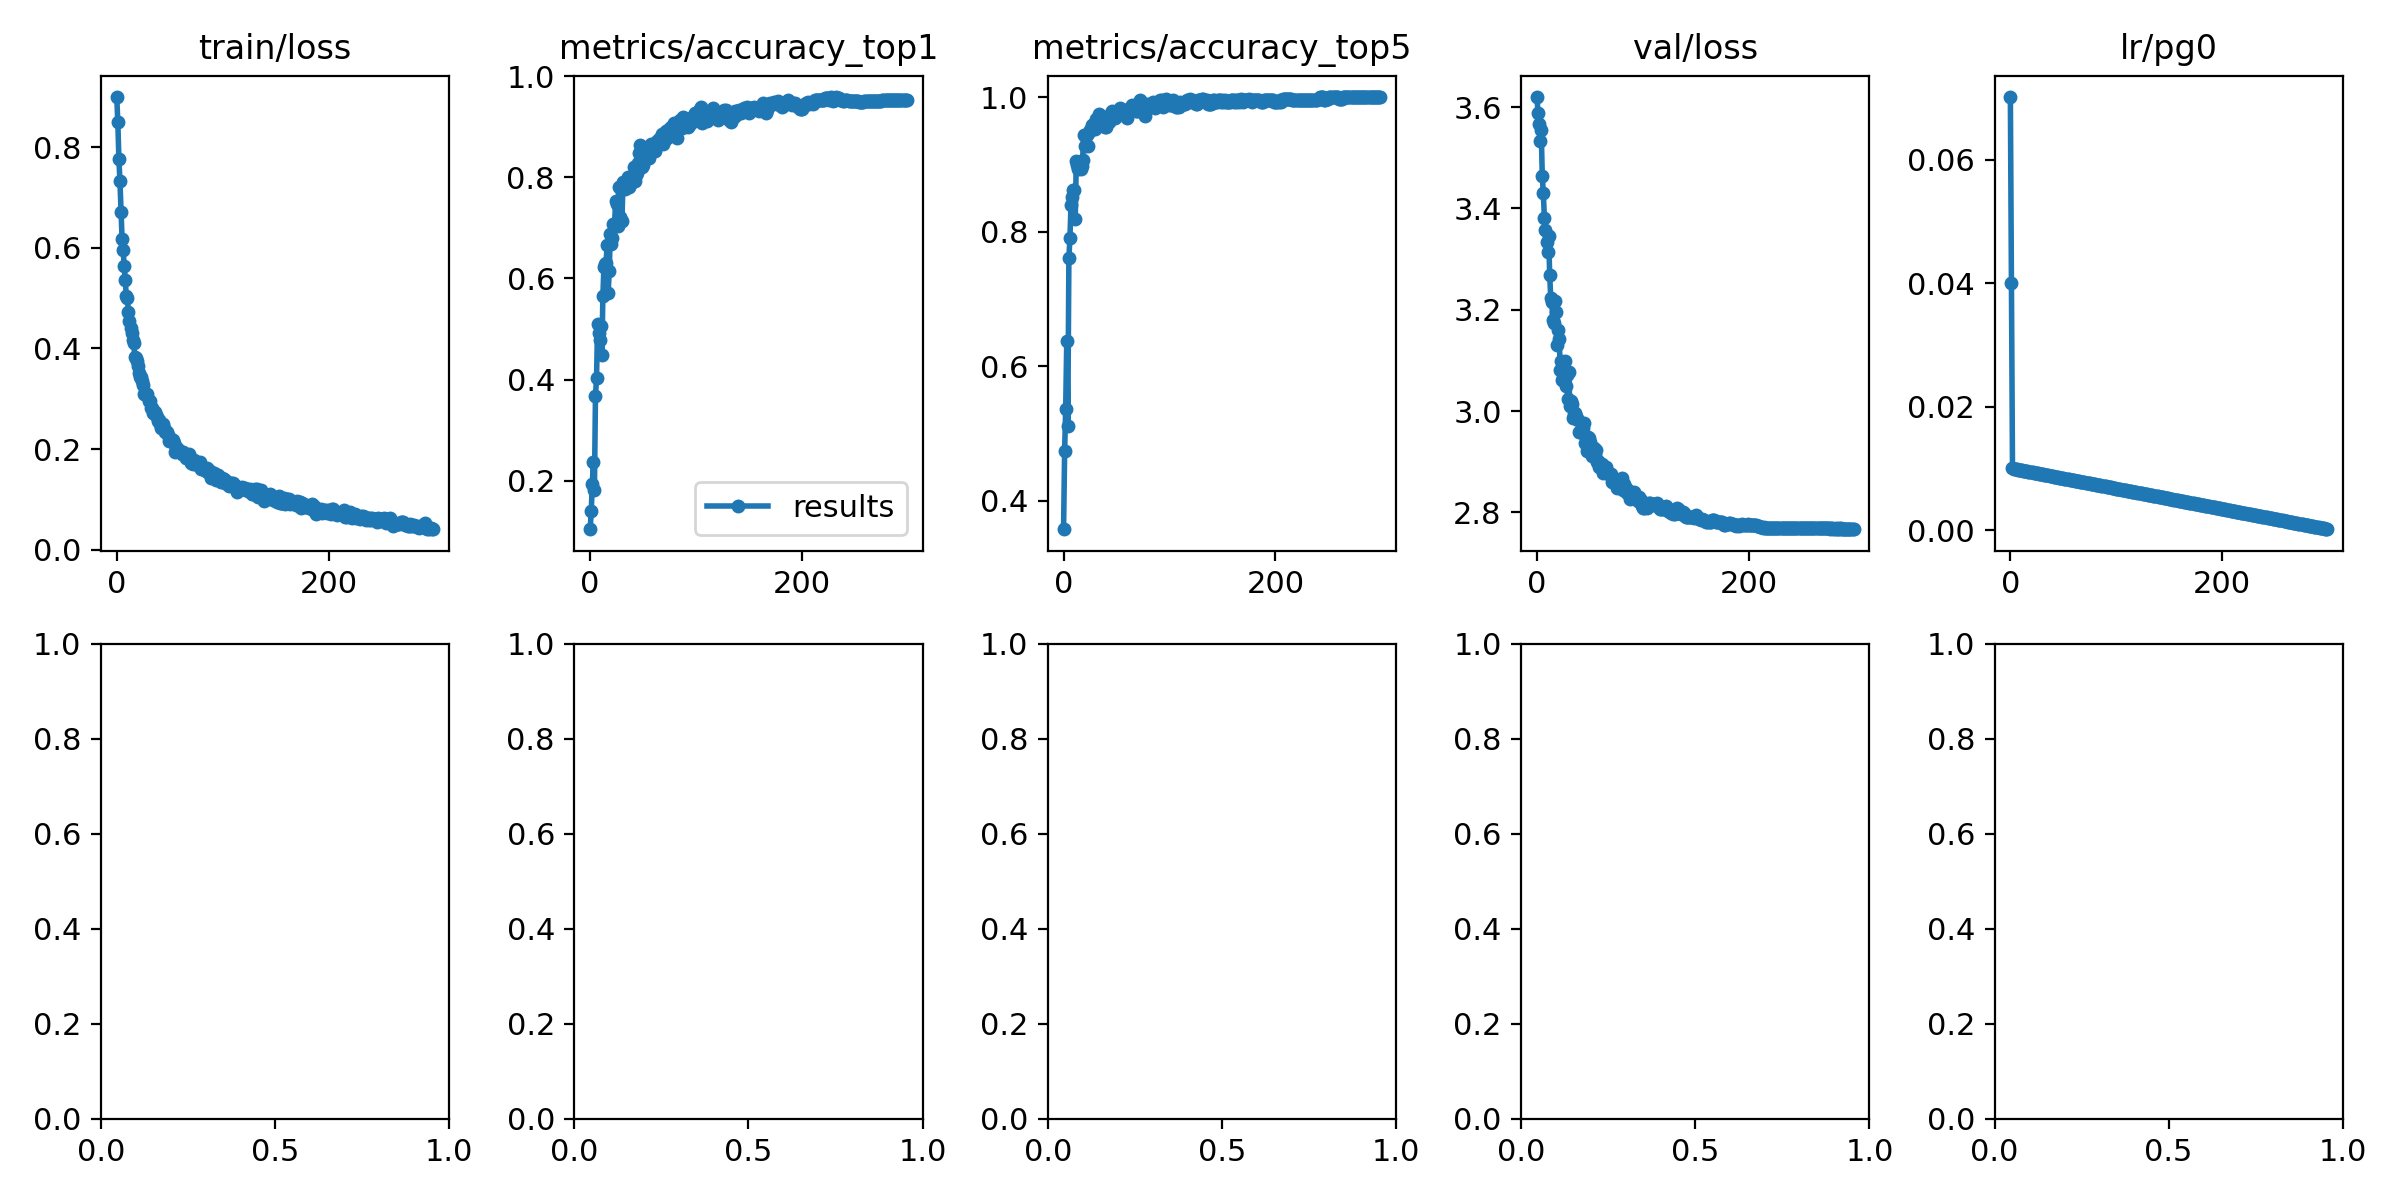

In [37]:
from IPython.display import display, Image
Image(filename=f'/content/runs/classify/train2/results.png', height=800)

In [48]:
#!yolo task=classify mode=val model=/content/runs/classify/train2/weights/best.pt data=/content/braintumor/ conf=0.5 plots= True
     

In [16]:
!yolo task=classify mode=predict model=/content/best.pt conf=0.25 source=/content/tumor/NeurocitomaT1/downloaded_image20211018-1662-19nteko_big_gallery.jpeg

Ultralytics YOLOv8.0.74 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
YOLOv8n-cls summary (fused): 73 layers, 1491244 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/tumor/NeurocitomaT1/downloaded_image20211018-1662-19nteko_big_gallery.jpeg: 128x128 Neurocitoma T1 1.00, Germinoma T1 0.00, Meningioma T1 0.00, Schwannoma T1 0.00, Papiloma T1 0.00, 12.9ms
Speed: 0.0ms preprocess, 12.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/classify/predict3


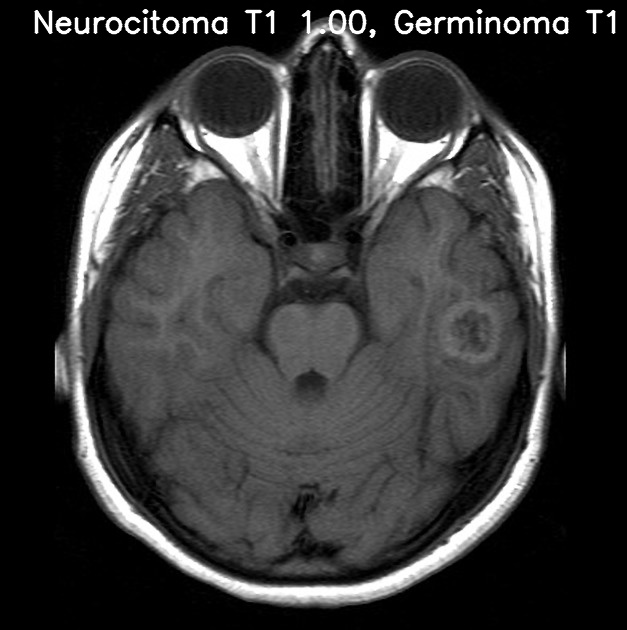

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/classify/predict3/downloaded_image20211018-1662-19nteko_big_gallery.jpeg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

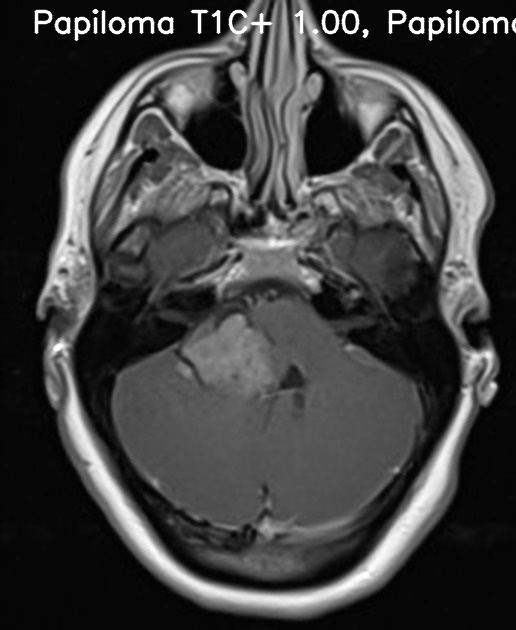

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/classify/predict2/8_big_gallery.jpeg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")